<a href="https://colab.research.google.com/github/mykon23/AI-2020/blob/master/Activities/Activity18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Convolution Operation

In [1]:
!wget -O my-cat.csv https://github.com/badriadhikari/AI-2020fall/blob/master/activities/my-cat.csv?raw=True

--2020-10-28 04:13:44--  https://github.com/badriadhikari/AI-2020fall/blob/master/activities/my-cat.csv?raw=True
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/badriadhikari/AI-2020fall/raw/master/activities/my-cat.csv [following]
--2020-10-28 04:13:44--  https://github.com/badriadhikari/AI-2020fall/raw/master/activities/my-cat.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/badriadhikari/AI-2020fall/master/activities/my-cat.csv [following]
--2020-10-28 04:13:44--  https://raw.githubusercontent.com/badriadhikari/AI-2020fall/master/activities/my-cat.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.1

Define Convolution Operation

In [2]:
import numpy as np

def convolution2D(image2D, kernel):
  ##Get shape of kernel
  win = kernel.shape[0]
  conv_shape = (len(image2D) - (win-1), len(image2D) - (win-1))
  convolved2D = np.zeros( conv_shape )
  
  ##Iterate through the grid to set the values
  for i in range( conv_shape[0] ):
    for j in range( conv_shape[0] ):
      convolved2D[i,j] = (image2D[i:i + win, j:j + win] * kernel).flatten().sum()
  return convolved2D

Edge Detection Filter

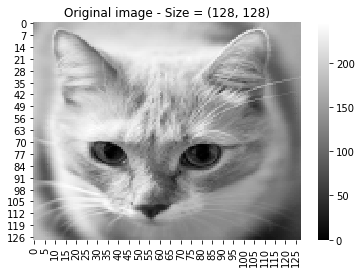

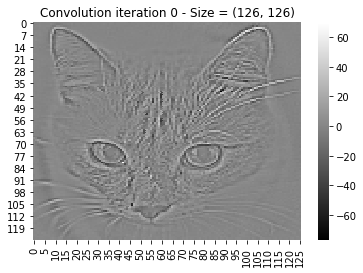

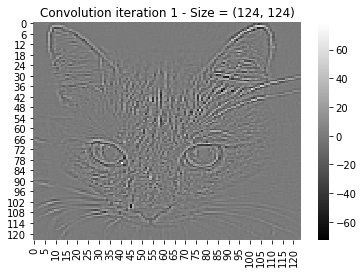

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

image2D = np.loadtxt('my-cat.csv', delimiter=',')
sns.heatmap(image2D, cmap='gray')
plt.title('Original image - Size = ' + str(image2D.shape))
plt.show()

##Edge detection filter from http://www.dspguide.com/ch24/2.htm
edge_detect_filter_3x3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])/8

for i in range(2):
  convolved_image = convolution2D(image2D, edge_detect_filter_3x3)
  sns.heatmap(convolved_image, cmap='gray')
  plt.title('Convolution iteration ' + str(i) + ' - Size = ' + str(convolved_image.shape))
  plt.show()
  image2D = convolved_image